# Lab: Titanic EDA

This week is all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this lab, we're going to take a look at the Titanic's passenger manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Prework

This is a fairly common 'toy' dataset (although it's definitely dirty) used for teaching cleaning and some modeling. You can find out more here: [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

## Step 1: Reading the data

1. If you look at the dataset directory, you'll see a .csv and a .txt file. The .csv is your data. The .txt is a brief data dictionary.
2. Take a minute read the data dictionary and understand how the data is structured.
3. In this notebook, load the csv into pandas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_data = pd.read_csv('titanic.csv')
titanic_data.rename(columns= {"survived" : "Survived", "pclass" : "Pclass", "name" : "Name", "sex" : "Sex", "age" : "Age",
                              "sibsp" : "SibSp", "parch" : "Parch", "ticket" : "Ticket", "fare" : "Fare", "cabin" : "Cabin",
                              "embarked" : "Embarked"}, inplace= True)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# New Section

In [3]:
titanic_data.shape

(891, 11)

In [4]:
titanic_data['Survived'].unique()

array([0, 1], dtype=int64)

In [5]:
titanic_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [6]:
titanic_data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

**Note**: The age column has some missing values

**Note**: Some ages less than 1. We are going to assume they are babies.

In [7]:
titanic_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
titanic_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [9]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
age_median = round(titanic_data['Age'].median(),2)
age_median

28.0

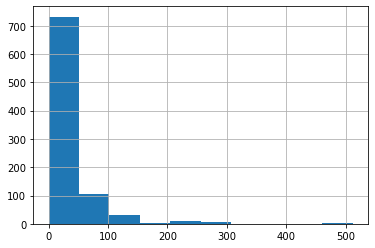

In [11]:
titanic_data['Fare'].hist();

In [12]:
titanic_data_negative_age = titanic_data.query('Age == 0.42') 

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [14]:
titanic_data_negative_age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [15]:
204/891

0.22895622895622897

### Handle Missing Values
1. median imputation
2. Mean Imputation
3. Advanced Techniques.(KNN imputation, regression imputation)
4. Delete missing rows
5. Delete Column, 80% 

In [16]:
titanic_data['Age'].fillna(age_median, inplace=True)
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
titanic_data['Age'] = titanic_data['Age'].astype('int')

*Note*: We are rounding age values to nearest whole number*



In [19]:
titanic_data.iloc[803]

Survived                                  1
Pclass                                    3
Name        Thomas, Master. Assad Alexander
Sex                                    male
Age                                       0
SibSp                                     0
Parch                                     1
Ticket                                 2625
Fare                                 8.5167
Cabin                                   NaN
Embarked                                  C
Name: 803, dtype: object

In [20]:
titanic_data['Age'].unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [21]:
titanic_data_negative_age = titanic_data.query('Age == 1') 

In [22]:
titanic_data_negative_age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,0,3,"Panula, Master. Eino Viljami",male,1,4,1,3101295,39.6875,NaN,S
172,1,3,"Johnson, Miss. Eleanor Ileen",female,1,1,1,347742,11.1333,NaN,S
183,1,2,"Becker, Master. Richard F",male,1,2,1,230136,39.0000,F4,S
381,1,3,"Nakid, Miss. Maria (""Mary"")",female,1,0,2,2653,15.7417,NaN,C
386,0,3,"Goodwin, Master. Sidney Leonard",male,1,5,2,CA 2144,46.9000,NaN,S
788,1,3,"Dean, Master. Bertram Vere",male,1,1,2,C.A. 2315,20.5750,NaN,S
827,1,2,"Mallet, Master. Andre",male,1,0,2,S.C./PARIS 2079,37.0042,NaN,C


In [23]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [24]:
titanic_data_negative_age = titanic_data.query('Age < 1') 
titanic_data_negative_age

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,1,2,"Caldwell, Master. Alden Gates",male,0,0,2,248738,29.0000,NaN,S
305,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S
469,1,3,"Baclini, Miss. Helene Barbara",female,0,2,1,2666,19.2583,NaN,C
644,1,3,"Baclini, Miss. Eugenie",female,0,2,1,2666,19.2583,NaN,C
755,1,2,"Hamalainen, Master. Viljo",male,0,1,1,250649,14.5000,NaN,S
803,1,3,"Thomas, Master. Assad Alexander",male,0,0,1,2625,8.5167,NaN,C
831,1,2,"Richards, Master. George Sibley",male,0,1,1,29106,18.7500,NaN,S


In [25]:
titanic_data.drop(titanic_data_negative_age.index, inplace =True)

In [26]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Name      884 non-null    object 
 3   Sex       884 non-null    object 
 4   Age       884 non-null    int32  
 5   SibSp     884 non-null    int64  
 6   Parch     884 non-null    int64  
 7   Ticket    884 non-null    object 
 8   Fare      884 non-null    float64
 9   Cabin     203 non-null    object 
 10  Embarked  882 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 79.4+ KB


In [27]:
titanic_data = titanic_data.drop(columns= ['Name', 'Ticket', 'Cabin'], axis = 1)


In [28]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Sex       884 non-null    object 
 3   Age       884 non-null    int32  
 4   SibSp     884 non-null    int64  
 5   Parch     884 non-null    int64  
 6   Fare      884 non-null    float64
 7   Embarked  882 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 58.7+ KB


In [29]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [30]:
titanic_data[titanic_data.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38,0,0,80.0,NaN
829,1,1,female,62,0,0,80.0,NaN


In [31]:
mode_emb = titanic_data['Embarked'].mode()[0]
mode_emb 
# titanic_data.Embarked.value_counts()

'S'

In [32]:
titanic_data['Embarked'].fillna(mode_emb[0],inplace=True)

In [ ]:
#titanic_data["Embarked"].fillna(method="mode", inplace=True)

In [33]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [34]:
titanic_data.dropna(inplace=True)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Sex       884 non-null    object 
 3   Age       884 non-null    int32  
 4   SibSp     884 non-null    int64  
 5   Parch     884 non-null    int64  
 6   Fare      884 non-null    float64
 7   Embarked  884 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 58.7+ KB


In [35]:
titanic_data.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 884, dtype: int64

In [36]:
survived = titanic_data.Survived == True

In [37]:
died = titanic_data.Survived == False

In [38]:
titanic_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C


In [39]:
titanic_data.Fare[survived].mean()

48.628048059701484

In [40]:
titanic_data.Fare[died].mean()

22.117886885245877

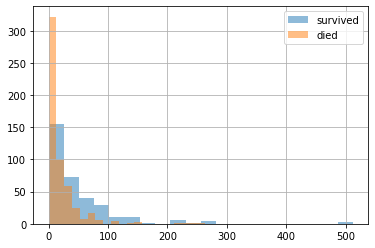

In [41]:
titanic_data.Fare[survived].hist(alpha=0.5, bins=20, label='survived')
titanic_data.Fare[died].hist(alpha=0.5, bins=20, label='died')
plt.legend();

In [42]:
titanic_data.groupby('Pclass').Survived.mean()


Pclass
1    0.627907
2    0.464088
3    0.237705
Name: Survived, dtype: float64

In [43]:
titanic_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.627907
2    0.464088
3    0.237705
Name: Survived, dtype: float64

In [44]:
titanic_data.groupby('Pclass')['Pclass'].mean()

Pclass
1    1.0
2    2.0
3    3.0
Name: Pclass, dtype: float64

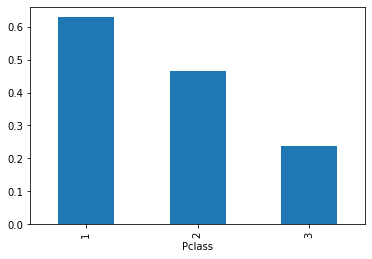

In [45]:
titanic_data.groupby('Pclass').Survived.mean().plot(kind= 'bar');

male      572
female    312
Name: Sex, dtype: int64

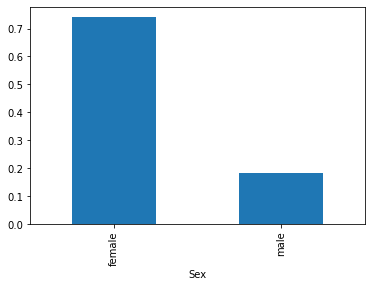

In [46]:
titanic_data.groupby('Sex').Survived.mean().plot(kind= 'bar');
titanic_data.Sex.value_counts()

In [47]:
titanic_data.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         142
        1          94
        2          76
male    3         346
        1         121
        2         105
Name: Pclass, dtype: int64

In [48]:
titanic_data.query('Sex == "female"')['Fare'].median(), titanic_data.query('Sex == "male"')['Fare'].median()


(23.125, 10.5)

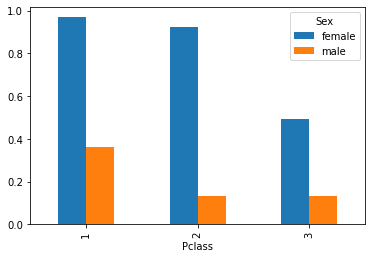

In [49]:
titanic_data.groupby(['Pclass', 'Sex']).Survived.mean().unstack().plot(kind='bar');

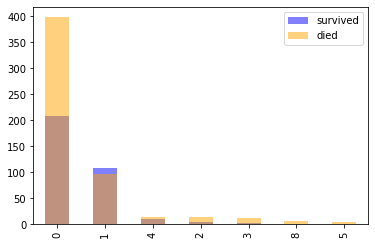

In [50]:
titanic_data.SibSp[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
titanic_data.SibSp[died].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.legend();

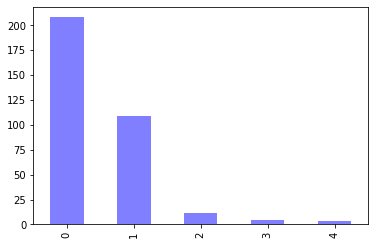

In [51]:
titanic_data.SibSp[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived');

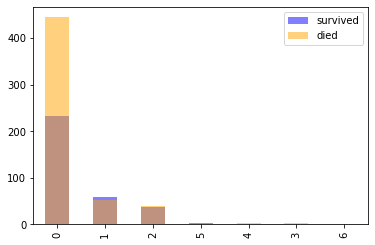

In [52]:
titanic_data.Parch[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
titanic_data.Parch[died].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.legend();

In [53]:
titanic_data.SibSp[survived].value_counts()

0    208
1    109
2     11
3      4
4      3
Name: SibSp, dtype: int64

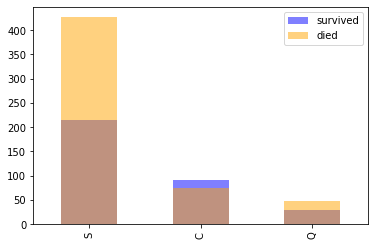

In [54]:
titanic_data.Embarked[survived].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='survived')
titanic_data.Embarked[died].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='died')
plt.legend();

In [55]:
titanic_data.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 884, dtype: bool

C:\Users\JUSTIC~1\AppData\Local\Temp/ipykernel_9112/1681822823.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_data.fillna(titanic_data.mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Sex       884 non-null    object 
 3   Age       884 non-null    int32  
 4   SibSp     884 non-null    int64  
 5   Parch     884 non-null    int64  
 6   Fare      884 non-null    float64
 7   Embarked  884 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 58.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Sex       884 non-null    object 
 3   Age       884 non-null    int32  
 4   SibSp     884 non-null    int64  
 5   Parch     884 non-null    int64  
 6   Fare      88

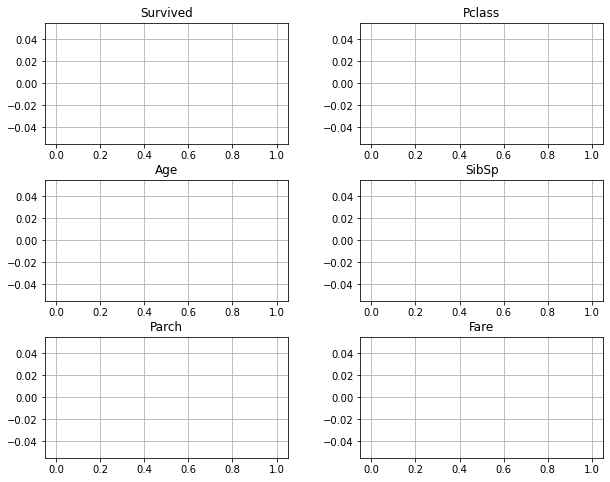

In [56]:
titanic_data[titanic_data.Age.isnull()].hist(figsize=(10,8));
titanic_data.fillna(titanic_data.mean(), inplace=True)
titanic_data.info()

titanic_data[titanic_data.Embarked.isnull()]
titanic_data.dropna(inplace=True)
titanic_data.info()

## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [57]:
sns.set_style('dark')
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head(2)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


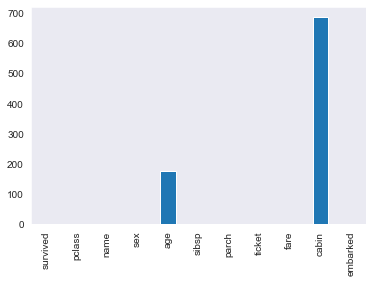

In [58]:
# Create a bar chart showing how many missing values are in each column
titanic_data.isnull().sum().plot(kind= 'bar');

In [59]:
# Which column has the most NaN values? How many cells in that column are empty?
titanic_data.cabin.isna().sum()

687

In [68]:
# Delete all rows where Embarked is empty
titanic_data.dropna(subset=['embarked', 'name'], inplace=True)
titanic_data.embarked.isnull().sum()

0

In [69]:
# Fill all empty cabins with ¯\(ツ)/¯
titanic_data.cabin.fillna('¯\(ツ)/¯', inplace= True)
titanic_data.cabin.isna().sum()

0

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [70]:
# There are two columns that pertain to how many family members are on the boat for a given person.
#  Create a new column called FamilyCount which will be the sum of those two columns.
titanic_data['FamilyCount'] = titanic_data.sibsp + titanic_data.parch
titanic_data.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,FamilyCount
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0


In [71]:
# Reverends have a special title in their name.
#  Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
titanic_data['IsReverend'] = titanic_data.name.copy().str.contains('Rev').astype(int)
titanic_data.IsReverend.unique()

array([0, 1])

In [72]:
# In order to feed our training data into a classification algorithm, 
# we need to convert our categories into 1's and 0's using pd.get_dummies
# Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's 
# that correspond to the C, Q and S values in the Embarked column
titanic_data = pd.get_dummies(titanic_data, columns= ['sex', 'embarked'])
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   name         889 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   ticket       889 non-null    object 
 7   fare         889 non-null    float64
 8   cabin        889 non-null    object 
 9   FamilyCount  889 non-null    int64  
 10  IsReverend   889 non-null    int32  
 11  sex_female   889 non-null    uint8  
 12  sex_male     889 non-null    uint8  
 13  embarked_C   889 non-null    uint8  
 14  embarked_Q   889 non-null    uint8  
 15  embarked_S   889 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), object(3), uint8(5)
memory usage: 84.2+ KB


In [73]:
# BONUS: Extract the title from everyone's name and create dummy columns
titanic_data['Title'] = titanic_data.name.str.extract('([A-Za-z]+\.)')
titanic_data

,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,FamilyCount,IsReverend,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,Title
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,1,0,0,1,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,1,0,0,Mrs.
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,1,0,0,0,1,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,1,Mrs.
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,1,0,0,1,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,¯\(ツ)/¯,0,1,0,1,0,0,1,Rev.
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1,0,0,0,1,Miss.
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,3,0,1,0,0,0,1,Miss.
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,0,0,1,1,0,0,Mr.


## Step 4: Exploratory analysis
1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [74]:
# What was the survival rate overall?
survived = titanic_data.survived == True
died = titanic_data.survived == False
survival_rate = survived.sum() / len(titanic_data.survived)
survival_rate

0.38245219347581555

In [75]:
# Which gender fared the worst? What was their survival rate?
male_survival_rate = titanic_data.sex_male[survived].sum() / survived.sum()
female_survival_rate = titanic_data.sex_female[survived].sum() / survived.sum()
male_survival_rate, female_survival_rate

(0.3205882352941177, 0.6794117647058824)

In [76]:
# What was the survival rate for each Pclass?
pclass_survival_rate = titanic_data.groupby('pclass').survived.sum() / survived.sum()
pclass_survival_rate

pclass
1    0.394118
2    0.255882
3    0.350000
Name: survived, dtype: float64

In [77]:
# Did any reverends survive? How many?
survived_reverends = titanic_data.IsReverend[survived].sum()
survived_reverends

0

In [93]:
# What is the survival rate for cabins marked ¯\(ツ)/¯
titanic_data[titanic_data['cabin'] == '¯\(ツ)/¯']['survived'].sum()/survived.sum()

0.6058823529411764

In [94]:
# What is the survival rate for people whose Age is empty?
empty_age_survival_rate = titanic_data.age[survived].isna().sum() / survived.sum()
empty_age_survival_rate

0.15294117647058825

In [95]:
# What is the survival rate for each port of embarkation?
embarkation_C_survival_rate = titanic_data.embarked_C[survived].sum() / survived.sum()
embarkation_Q_survival_rate = titanic_data.embarked_Q[survived].sum() / survived.sum()
embarkation_S_survival_rate = titanic_data.embarked_S[survived].sum() / survived.sum()

embarkation_C_survival_rate, embarkation_Q_survival_rate, embarkation_S_survival_rate

(0.2735294117647059, 0.08823529411764706, 0.638235294117647)

In [96]:
# What is the survival rate for children (under 12) in each Pclass?
(titanic_data.query('age < 12')).groupby('pclass').survived.sum() / survived.sum()

pclass
1    0.008824
2    0.050000
3    0.055882
Name: survived, dtype: float64

In [97]:
# Did the captain of the ship survive? Is he on the list?
titanic_data.loc[titanic_data.Title.str.contains('Capt')]

,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,FamilyCount,IsReverend,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,Title
745,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,2,0,0,1,0,0,1,Capt.


In [112]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
#titanic_data.loc[titanic_data.fare == titanic_data.fare[died].max()]
titanic_data.query('survived == False')['fare'].max()

263.0

In [99]:
# Does having family on the boat help or hurt your chances of survival?
titanic_data.query('FamilyCount > 1').survived.sum() / survived.sum()

0.2647058823529412

## Step 5: Plotting
1. Using matplotlib and/or seaborn, create some charts from this data.


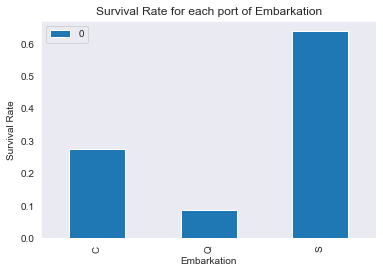

In [100]:
# What is the survival rate for each port of embarkation?
labels = ['C', 'Q', 'S']
pd.DataFrame([embarkation_C_survival_rate, embarkation_Q_survival_rate, embarkation_S_survival_rate]).plot(kind= 'bar')
plt.xlabel('Embarkation')
plt.ylabel('Survival Rate')
plt.xticks(np.arange(len(labels)), labels = ['C', 'Q', 'S'])
plt.title('Survival Rate for each port of Embarkation');

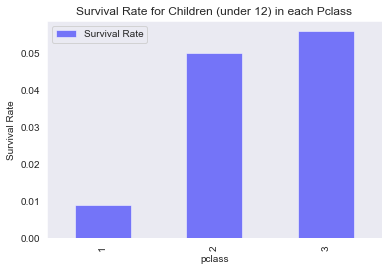

In [101]:
# What is the survival rate for children (under 12) in each Pclass?
((titanic_data.query('age < 12')).groupby('pclass').survived.sum() / survived.sum()).plot(kind= 'bar', color= 'blue', alpha= 0.5, label= 'Survival Rate')
plt.title('Survival Rate for Children (under 12) in each Pclass')
plt.ylabel('Survival Rate')
plt.legend();

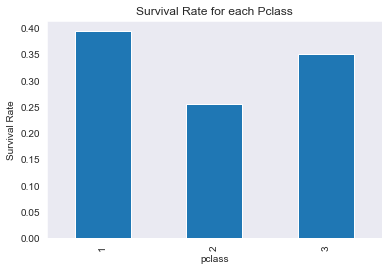

In [102]:
# What was the survival rate for each Pclass?
pclass_survival_rate.plot(kind= 'bar')
plt.ylabel('Survival Rate')
plt.title('Survival Rate for each Pclass');

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

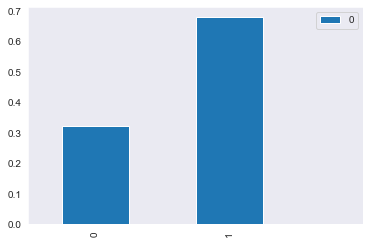

In [106]:
# Which gender fared the worst? What was their survival rate?
pd.DataFrame([male_survival_rate, female_survival_rate]).plot(kind= 'bar')
plt.xticks(np.arange(len(labels)), labels = ['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender');